# 1.把图像作为像素网格

### 导入资源

In [1]:
import numpy as np
import matplotlib.image as mpimg  # for reading in images

import matplotlib.pyplot as plt
import cv2  # computer vision library

%matplotlib inline

### 读入并显示图像

Image dimensions: (427, 640, 3)


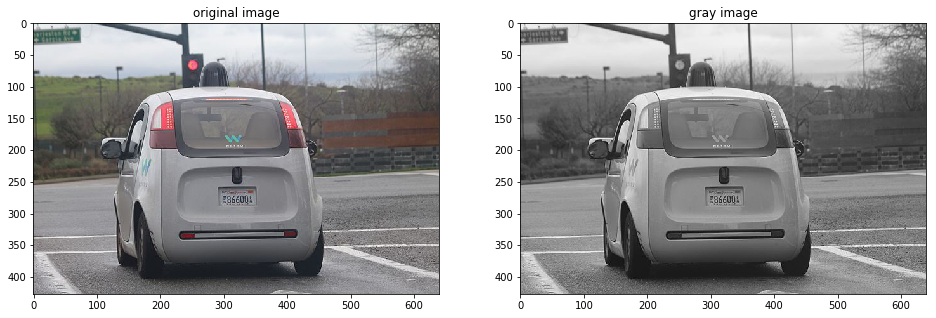

In [2]:
# Read in the image
image = mpimg.imread('images/waymo_car.jpg')

# Print out the image dimensions
print('Image dimensions:', image.shape)

fig = plt.figure(figsize=(16,6))

p1=plt.subplot(1,2,1)
plt.imshow(image)
p1.set_title('original image')

# Change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
p2=plt.subplot(1,2,2)
plt.imshow(gray_image, cmap='gray')
p2.set_title('gray image')

plt.show()

In [3]:
# Print specific grayscale pixel values
# What is the pixel value at x = 400 and y = 300 (on the body of the car)?

x = 400
y = 300
print(gray_image[y,x])

#Find the maximum and minimum grayscale values in this image
max_val = np.amax(gray_image)
min_val = np.amin(gray_image)

print('Max: ', max_val)
print('Min: ', min_val)

159
Max:  255
Min:  2


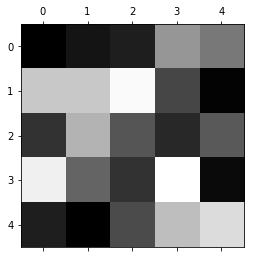

In [4]:
# Create a 5x5 image using just grayscale, numerical values
tiny_image = np.array([[0, 20, 30, 150, 120],
                      [200, 200, 250, 70, 3],
                      [50, 180, 85, 40, 90],
                      [240, 100, 50, 255, 10],
                      [30, 0, 75, 190, 220]])

# To show the pixel grid, use matshow
plt.matshow(tiny_image, cmap='gray')

## TODO: See if you can draw a tiny smiley face or something else!

# 2.RGB 颜色空间

将每个颜色通道的级别可视化。 密切关注交通标志！

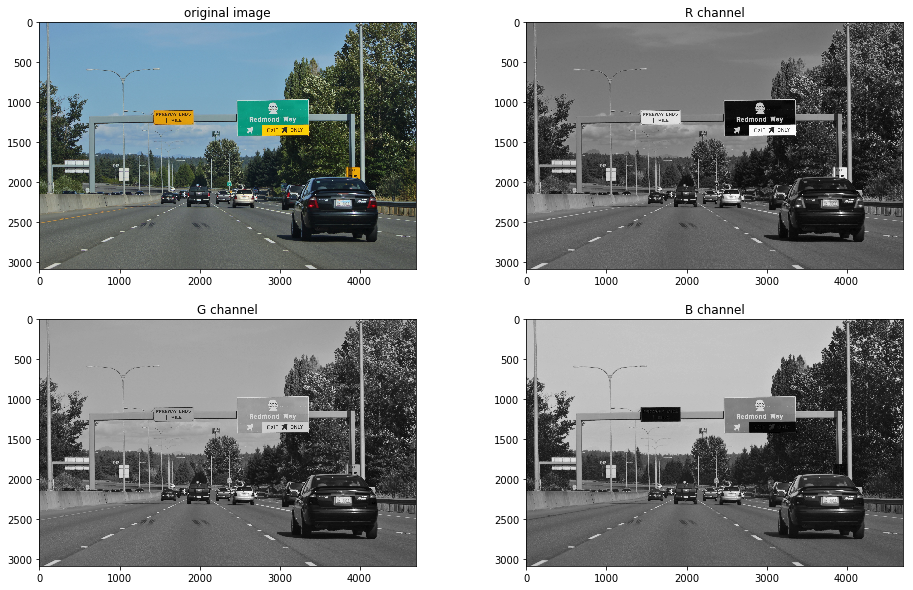

In [5]:
image = mpimg.imread('images/wa_state_highway.jpg')

# Isolate RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# Visualize the individual color channels
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(16,10))
ax0.set_title('original image')
ax0.imshow(image)
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

## Which area has the lowest value for red? What about for blue?

# 3.颜色阈值与绿屏

### 读入并显示图像

Image dimensions: (450, 660, 3)


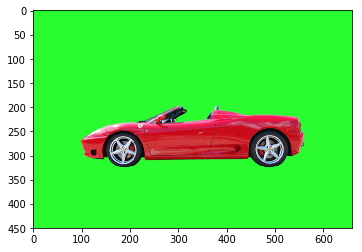

In [6]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)
# Display the image
plt.imshow(image)

### 定义颜色阈值

In [7]:
lower_green = np.array([0,80,0]) 
upper_green = np.array([80,255,80])

### 创建一个遮罩

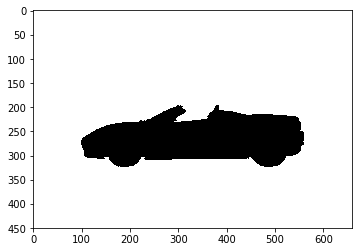

In [8]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

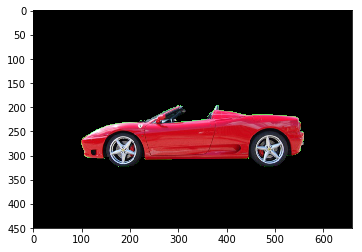

In [9]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

### 遮罩并添加背景图像

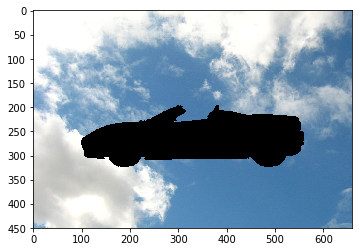

In [10]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')

## Crop it or resize the background to be the right size (450x660)
crop_background = np.copy(background_image)[:450,:660]

## Mask the cropped background so that the pizza area is blocked
# Hint mask the opposite area of the previous image
crop_background[mask == 0] = [0,0,0]
## Display the background and make sure 
plt.imshow(crop_background)

### 创建一个完整的图像

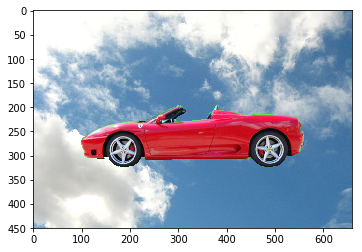

In [11]:
## TODO: Add the two images together to create a complete image!
complete_image = masked_image + crop_background

plt.imshow(complete_image)

# 4.颜色阈值与蓝屏

This image is: <class 'numpy.ndarray'>  with dimensions: (514, 816, 3)


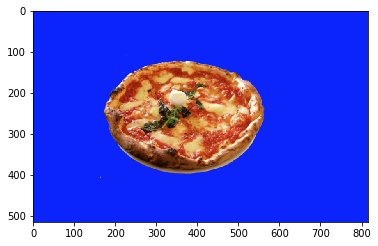

In [12]:
# Read in the image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

### 定义颜色阈值

In [13]:
lower_blue = np.array([0,0,220]) 
upper_blue = np.array([220,220,255])

### 创建一个遮罩

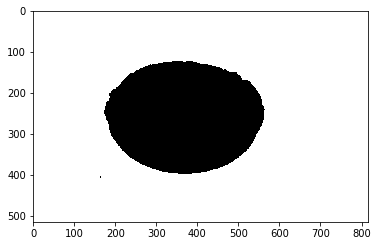

In [14]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

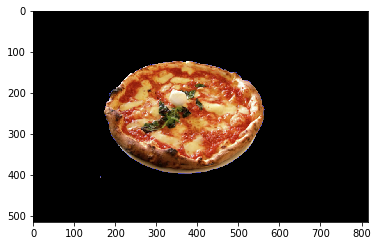

In [15]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

### 遮罩并添加背景图像

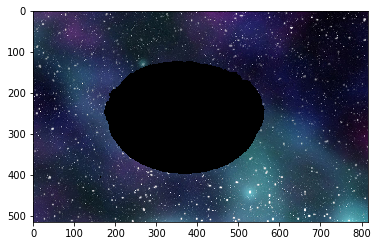

In [16]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = background_image[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

### 创建一个完整的图像

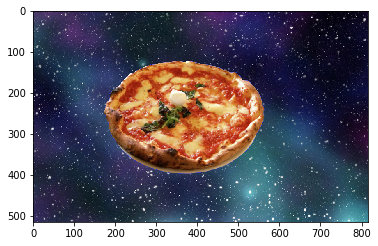

In [17]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)

# 5.HSV颜色空间

HSV分别代表色相，饱和度，明度 [Hue,Saturation,Value]

一个HSV的示例:<br>
将明度Value分离出来，这个分量收照明条件的影响最大;<br>
H通道则基本不受阴影或过高亮度的影响，如果依靠这个通道，舍弃V通道的信息那就能对彩色物体进行检测，而且效果比在RGB颜色空间中更为可靠

色相的衡量尺度范围在0~180之间，0代表色相最暗，180色相最亮，饱和度和明度则在0~255之间

HLS则是指色相，亮度，饱和度 [Hue,Lightness,Saturation]

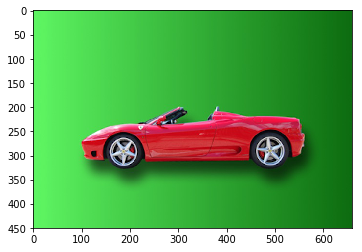

In [18]:
# Read in the image
image = mpimg.imread('images/car_green_screen2.jpg')

plt.imshow(image)

### RGB阈值 

将之前示例中定义的绿色阈值可视化。

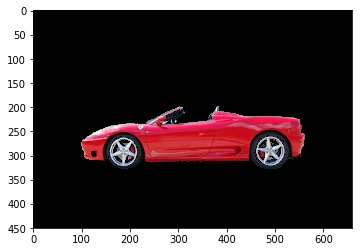

In [19]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0,50,0]) 
upper_green = np.array([100,255,100])

# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

### 转换为HSV

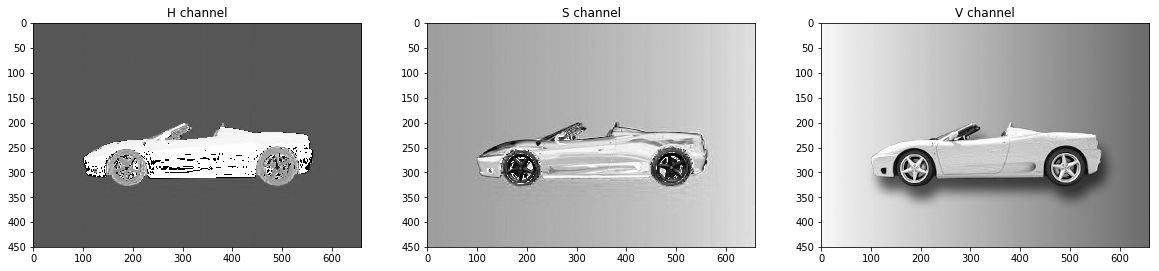

In [20]:
# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')

### 使用HSV颜色空间遮罩绿色区域

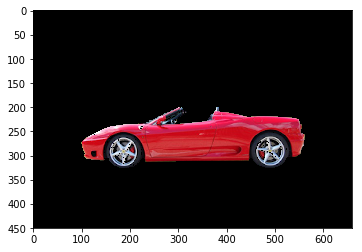

In [21]:
# Define our color selection boundaries in HSV values

## TODO: Change these thresholds
# This initial threshold allows a certain low range for Hue (H)
lower_hue = np.array([36, 0, 0]) 
upper_hue = np.array([86, 255,255])

# Define the masked area
mask = cv2.inRange(hsv, lower_hue, upper_hue)

# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

<建议>

1 可以参考 stackoverflow 上的回答；
https://stackoverflow.com/questions/47483951/how-to-define-a-threshold-value-to-detect-only-green-colour-objects-in-an-image

2 仅修改 Array 第一列即可；

# 6.HSV颜色空间：气球

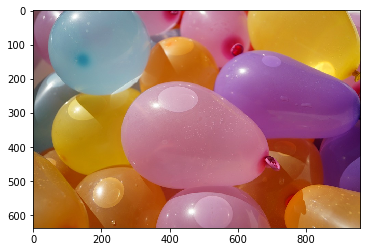

In [22]:
# Read in the image
image = cv2.imread('images/water_balloons.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### 绘制颜色通道图

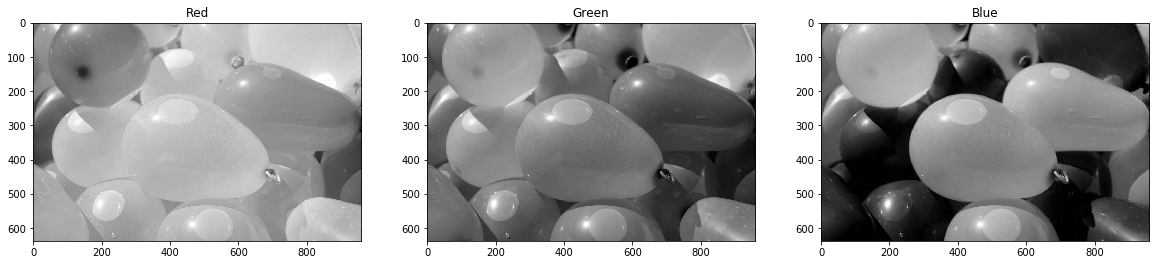

In [23]:
# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

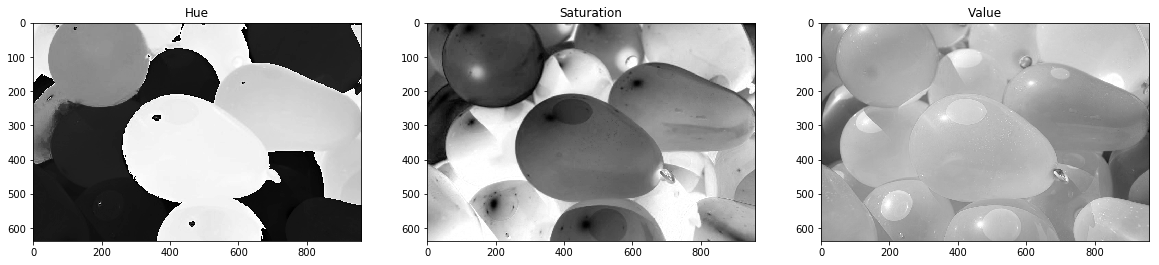

In [24]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')


### 遮罩该图像

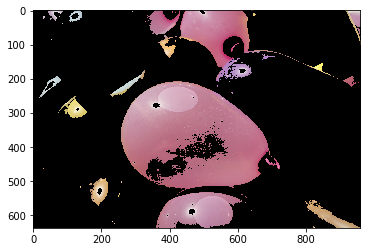

In [25]:
# Define our color selection criteria in RGB values
lower_pink = np.array([180,0,100]) 
upper_pink = np.array([255,255,230])

# Define the masked area in RGB space
mask_rgb = cv2.inRange(image, lower_pink, upper_pink)

# mask the image
masked_image = np.copy(image)
masked_image[mask_rgb==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

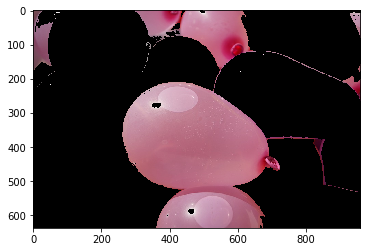

In [26]:
# Now try HSV!
# Define our color selection criteria in HSV values
lower_hue = np.array([160,0,0]) 
upper_hue = np.array([180,255,255])

# Define the masked area in HSV space
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(image)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)